In [ ]:
!pip install mpl_finance

In [ ]:
!pip install yfinance

In [3]:
import yfinance
from mpl_finance import candlestick_ohlc

In [4]:
import pandas as pd
import numpy as np
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime


In [5]:
%config InlineBackend.figure_format = 'svg'

In [6]:
tickers = ['BTAI', 'VUZI', 'RIOT', 'HRTX', 'HCA']

In [7]:
def get_ticker_data(name):
  candles_period = 180
  today = date.today()
  date_from = (datetime.now() - timedelta(days=candles_period)).strftime("%Y-%m-%d")
  date_to = today.strftime("%Y-%m-%d")
  ticker = yfinance.Ticker(name)
  df = ticker.history(interval="1d",start=date_from, end=date_to)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  df['s'] =  np.mean(df['High'] - df['Low'])
  return df  

In [8]:
def isFarFromLevel(l, s, levels):
   return np.sum([abs(l-x) < s  for x in levels]) == 0

In [9]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support
  
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [10]:
def make_levels(df):
  levels = []
  for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
      l = df['Low'][i]
      if isFarFromLevel(l, df['s'][i], levels):
        levels.append((i,l))
    elif isResistance(df,i):
      l = df['High'][i]
      if isFarFromLevel(l, df['s'][i], levels):
        levels.append((i,l))
  return levels

In [11]:
def plot_all(df, levels, name):
  fig, ax = plt.subplots()
  fig.set_figheight(6)
  fig.set_figwidth(10)
  candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  ax.set_title(name)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]], xmax=max(df['Date']),colors='blue', linewidths=0.6)
  
  fig.show()

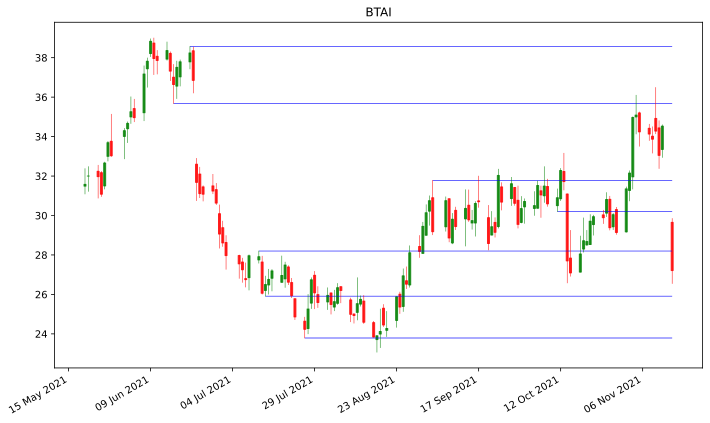

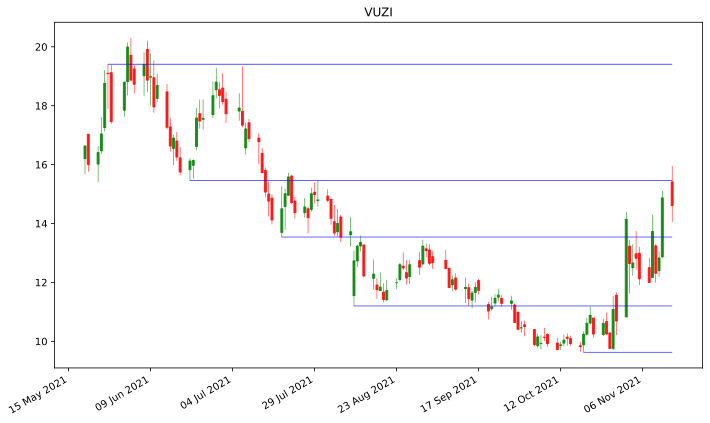

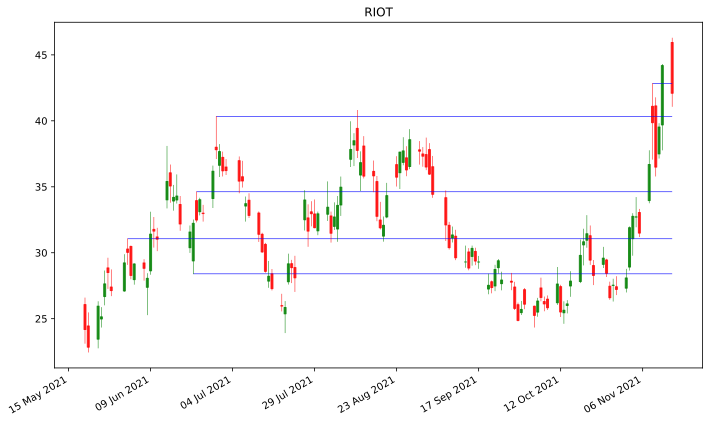

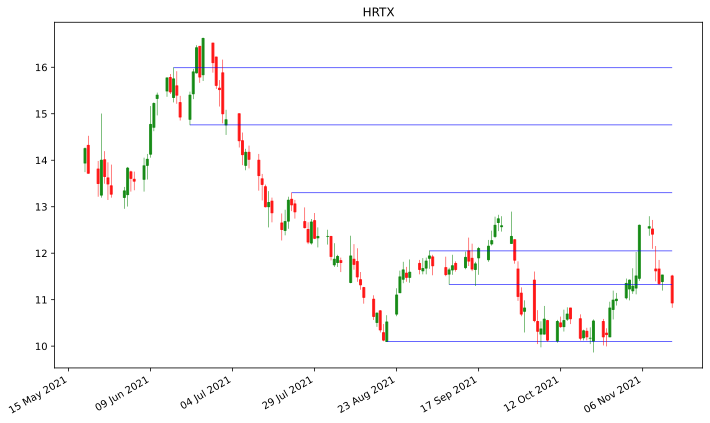

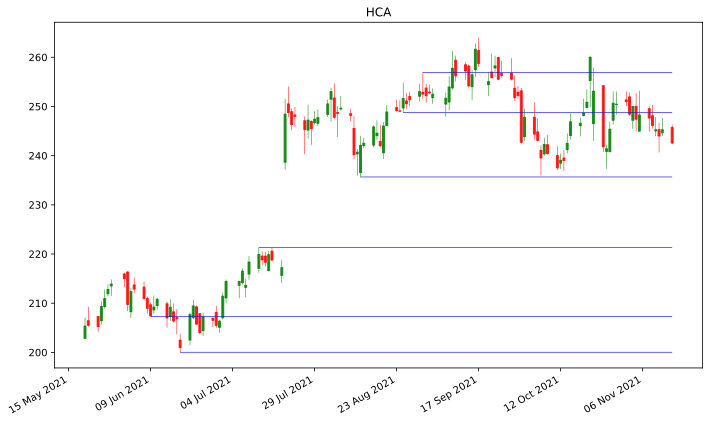

In [12]:
for i in tickers:
  df = get_ticker_data(i)
  levels = make_levels(df)
  plot_all(df, levels, i)

